In [1]:
%matplotlib widget

from IPython.display import display, Latex
import pandas as pd

import sympy
from sympy.abc import U
from sympy.simplify.fu import TR8

from visual import disp, plot, plot_harmonics
import calc

In [2]:
C = sympy.Symbol('C', real=True, positive=True)
beta = sympy.Symbol('beta', real=True, positive=True)
U_A = sympy.Symbol('U_A', real=True, positive=True)
u_amp = sympy.Symbol('\\breve{u}', real=True, positive=True)
f = sympy.Symbol('f', real=True, positive=True)
t = sympy.Symbol('t', real=True, positive=True)

In [3]:
val = {C: 120, beta: 0.16, U_A: 100, u_amp: 20, f: 1}

In [4]:
I = (U / C) ** (1 / beta)
disp(I, True)

<IPython.core.display.Latex object>

In [5]:
u = U_A + u_amp * sympy.sin(2 * sympy.pi * f * t)
disp(u)

<IPython.core.display.Latex object>

In [6]:
i = I.subs(U, u)
disp(i, True)

<IPython.core.display.Latex object>

In [7]:
iter = I.series(U, U_A, n=None)
I_taylor = 0 
terms = [next(iter) for i in range(5)]
for term in terms:
    I_taylor += term
disp(I_taylor, True)

<IPython.core.display.Latex object>

In [8]:
i_taylor = (I_taylor - I.subs(U, U_A)).subs([(C, val[C]), (beta, val[beta]), 
                          (U, u), (U_A, val[U_A]), (u_amp, val[u_amp])])
i_taylor = TR8(TR8(i_taylor.expand()).expand())
disp(i_taylor, True)

<IPython.core.display.Latex object>

In [9]:
T = 1 / f
i_hs, p_hs = calc.harmonics(i_taylor, n=4, limits=(t, 0, T))
disp(i_hs, True)
disp(p_hs, True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [10]:
k = calc.distortion_coeff(calc.effective([i_hs[1]]), calc.effective(i_hs[1:]))
disp(k)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

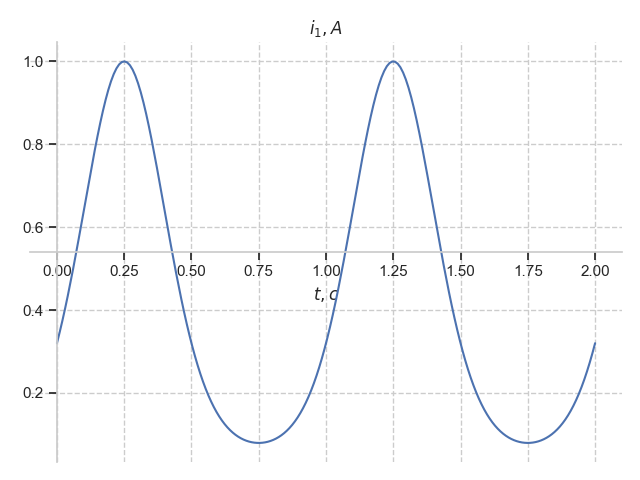

In [11]:
i_1 = i.subs([(C, val[C]), (beta, val[beta]), (U_A, val[U_A]),
              (u_amp, val[u_amp]), (f, val[f])])
disp(i_1, True)
plot(i_1, (t, 0, 2 / val[f]), 200, True)

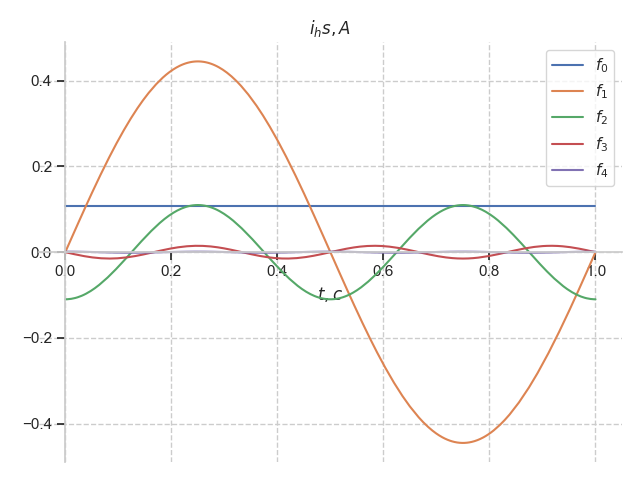

In [12]:
plot_harmonics(i_hs, p_hs, (t, 0, 1 / val[f]), val[f], si=True)